In [1]:
#Importação de pacotes
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
df = pd.read_csv('Clean_Dataset.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.preprocessing import MinMaxScaler #Utilizada para fazer a padronização dos dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

In [2]:
df.head(1)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


# TRADUZINDO A BASE DE DADOS

In [4]:
df_traduzida = df.rename(columns={'airline':'CompanhiaAérea','source_city':'CidadeOrigem','departure_time':'HorárioPartida','stops':'Paradas','arrival_time':'HorárioChegada','destination_city':'CidadeDestino','class':'ClasseEconomica','duration':'Duração','days_left':'DiasRestantes','price':'Preço'})
df_traduzida.head(1)

,Unnamed: 0,CompanhiaAérea,flight,CidadeOrigem,HorárioPartida,Paradas,HorárioChegada,CidadeDestino,ClasseEconomica,Duração,DiasRestantes,Preço
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


# MANIPULAÇÃO E TRATAMENTO DE DADOS

### VALORES NULOS E DUPLICADO

In [5]:
(df_traduzida.isnull().sum() / len(df_traduzida['Preço']))*100

Unnamed: 0         0.0
CompanhiaAérea     0.0
flight             0.0
CidadeOrigem       0.0
HorárioPartida     0.0
Paradas            0.0
HorárioChegada     0.0
CidadeDestino      0.0
ClasseEconomica    0.0
Duração            0.0
DiasRestantes      0.0
Preço              0.0
dtype: float64

In [6]:
df_traduzida.duplicated().sum()

0

In [7]:
df_traduzida = df_traduzida.drop_duplicates()

### EXCLUINDO COLUNAS QUE NÃO SERÃO UTILIZADAS

In [8]:
del df_traduzida['Unnamed: 0']
del df_traduzida['flight']

In [9]:
df_traduzida.groupby(df_traduzida['CompanhiaAérea']).size()

CompanhiaAérea
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
dtype: int64

In [10]:
df_traduzida.groupby(df_traduzida['CidadeOrigem']).size()

CidadeOrigem
Bangalore    52061
Chennai      38700
Delhi        61343
Hyderabad    40806
Kolkata      46347
Mumbai       60896
dtype: int64

In [11]:
df_traduzida.groupby(df_traduzida['CidadeDestino']).size()

CidadeDestino
Bangalore    51068
Chennai      40368
Delhi        57360
Hyderabad    42726
Kolkata      49534
Mumbai       59097
dtype: int64

In [12]:
df_traduzida.groupby(df_traduzida['ClasseEconomica']).size()

ClasseEconomica
Business     93487
Economy     206666
dtype: int64

In [13]:
df_traduzida.groupby(df_traduzida['Paradas']).size()

Paradas
one            250863
two_or_more     13286
zero            36004
dtype: int64

# ANÁLISE EXPLORATÓRIA

## ESTATÍSTICA

In [14]:
df_traduzida.describe()

,Duração,DiasRestantes,Preço
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


array([[<Axes: title={'center': 'Duração'}>,
        <Axes: title={'center': 'DiasRestantes'}>],
       [<Axes: title={'center': 'Preço'}>, <Axes: >]], dtype=object)

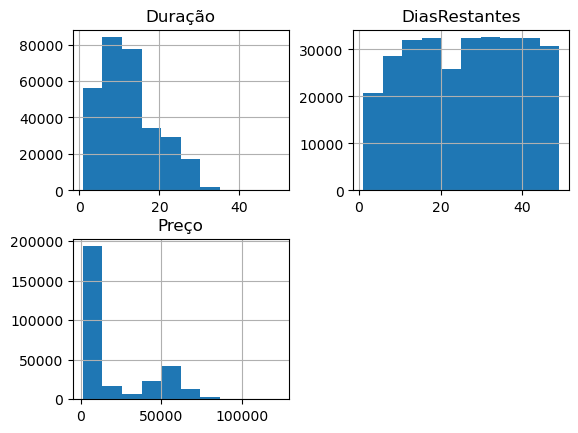

In [15]:
df_traduzida.hist()

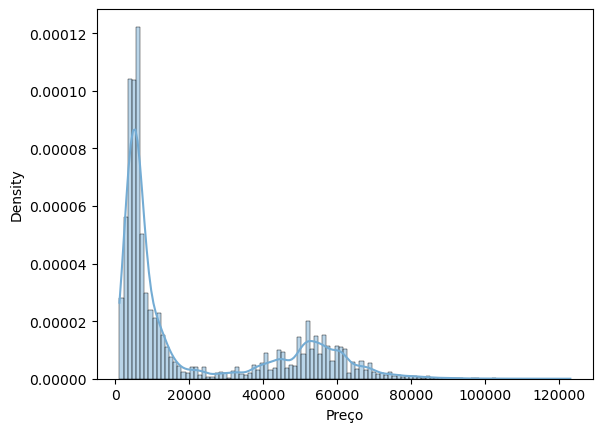

In [16]:
ax = sns.histplot(df_traduzida.Preço, stat="density", kde=True, color='#74acd4', lw=1)

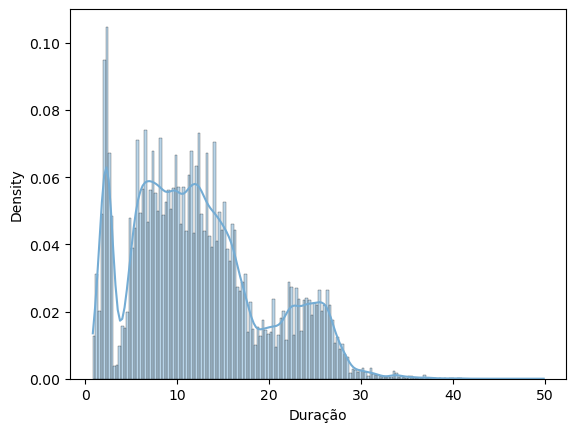

In [17]:
ax = sns.histplot(df_traduzida.Duração, stat="density", kde=True, color='#74acd4', lw=1)

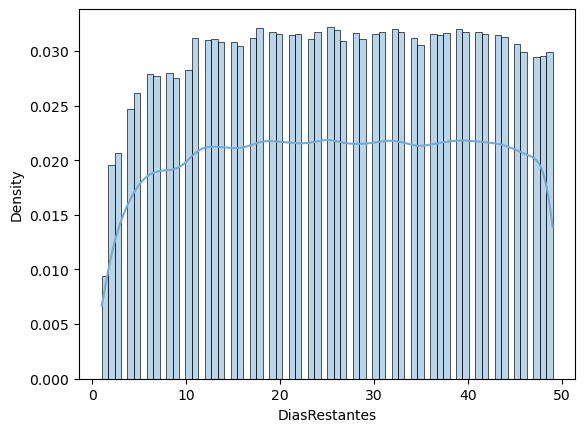

In [18]:
ax = sns.histplot(df_traduzida.DiasRestantes, stat="density", kde=True, color='#74acd4', lw=1)

### MODA

In [19]:
from statistics import mode

In [20]:
df_traduzida['Preço'].mode()

0    54608
Name: Preço, dtype: int64

In [21]:
df_traduzida['Duração'].mode()

0    2.17
Name: Duração, dtype: float64

In [22]:
df_traduzida['DiasRestantes'].mode()

0    25
Name: DiasRestantes, dtype: int64

### VERIFICANDO AS CORRELAÇÕES 

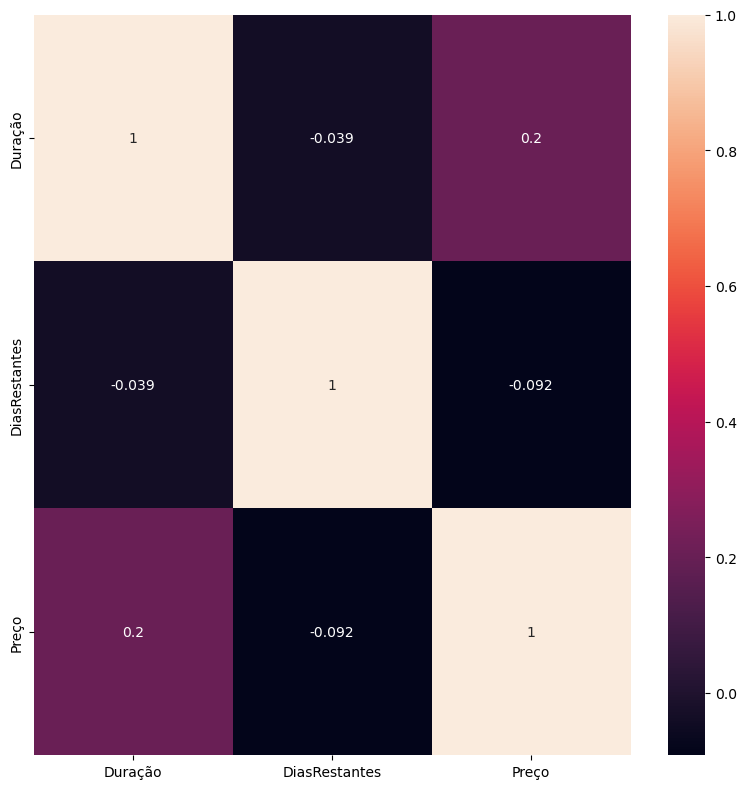

In [23]:
# Correlação
# A correção é utilizada para entender como as variaveis se relacionam entre si.
# A correção vai de -1 até +1 onde -1 significa uma forte correção negativa e +1 significa uma forte correlação positiva.
# Correlação NÃO é causalidade, ou seja, uma relação entre as variaveis não significa que uma é a causa do valor da outra.


plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(df_traduzida.corr(), annot=True)
plt.show()

### VERIFICANDO SE HÁ POSSIBILIDADE DE OUTHILIERS

Duração : float64
DiasRestantes : int64
Preço : int64


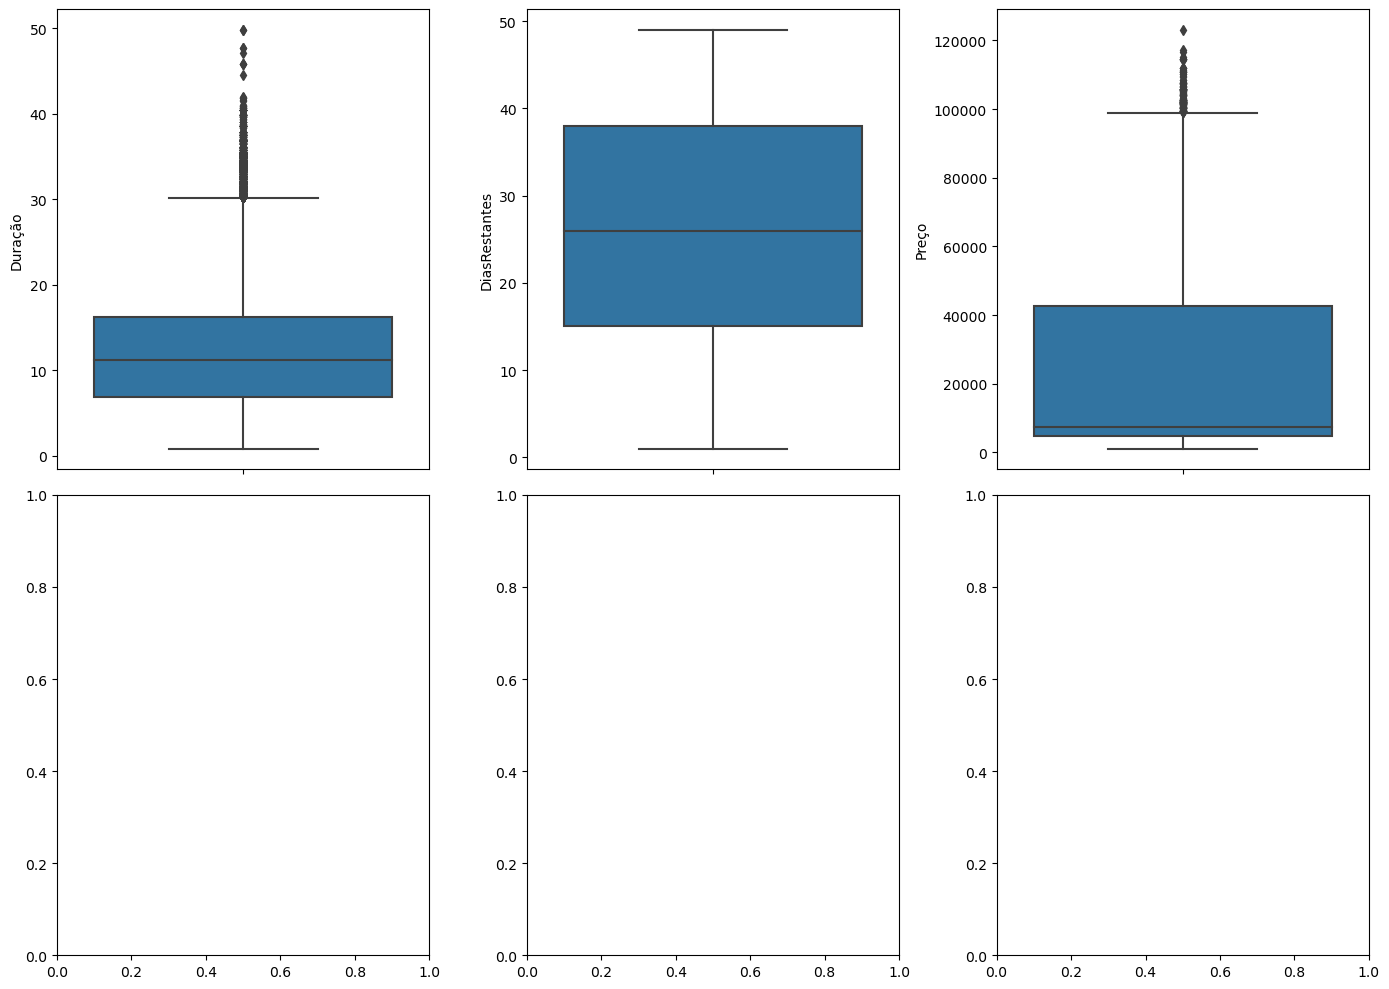

In [24]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show()

### ANÁLISE EXPLORATÓRIA DOS DADOS COM PYGWALKER

In [25]:
#!pip install pygwalker -q
import pygwalker as pyg
pyg.walk(df_traduzida)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# ANÁLISE DOS DADOS 

### EXCLUINDO VALORES DUPLICADOS GERADOS DURANTE O CODIGO

In [97]:
df_traduzida = df_traduzida.drop_duplicates()

In [98]:
df_traduzida = df_traduzida.drop_duplicates()

In [99]:
df_traduzida.head(1)

,CompanhiaAérea,CidadeOrigem,HorárioPartida,Paradas,HorárioChegada,CidadeDestino,ClasseEconomica,Duração,DiasRestantes,Preço
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


### ANALISANDO OS PREÇOS, SOMA, MÉDIA, QUANTIDADE DAS CAMPANHIAS AREA 

In [100]:
total_compras = df_traduzida.groupby(["CompanhiaAérea"]).sum()["Preço"].rename("Total de Vendas")
media_compra = df_traduzida.groupby(["CompanhiaAérea"]).mean()["Preço"].rename("Média das Vendas")
numero = df_traduzida.groupby(["CompanhiaAérea"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10)

,Total de Vendas,Média das Vendas,Número de Vendas
CompanhiaAérea,,,
Vistara,"$3,871,670,480.00","$30,494.72",126962
Air_India,"$1,901,365,519.00","$23,507.89",80882
Indigo,"$227,160,154.00","$5,348.72",42470
GO_FIRST,"$130,255,466.00","$5,668.46",22979
AirAsia,"$65,636,559.00","$4,099.47",16011
SpiceJet,"$53,634,919.00","$6,210.62",8636


### ANALISANDO OS PREÇOS, SOMA, MÉDIA, E QUANTIDADE DAS ORIGENS 

In [101]:
total_compras = df_traduzida.groupby(["CidadeOrigem"]).sum()["Preço"].rename("Total de Vendas")
media_compra = df_traduzida.groupby(["CidadeOrigem"]).mean()["Preço"].rename("Média das Vendas")
numero = df_traduzida.groupby(["CidadeOrigem"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10)

,Total de Vendas,Média das Vendas,Número de Vendas
CidadeOrigem,,,
Delhi,"$1,154,696,287.00","$19,082.73",60510
Mumbai,"$1,302,636,010.00","$21,574.68",60378
Bangalore,"$1,112,525,993.00","$21,565.60",51588
Kolkata,"$1,007,298,225.00","$21,784.13",46240
Hyderabad,"$822,054,204.00","$20,195.91",40704
Chennai,"$850,512,378.00","$22,079.76",38520


### ANALISANDO OS PREÇOS, SOMA, MÉDIA, E QUANTIDADE DOS DESTINOS 

In [102]:
total_compras = df_traduzida.groupby(["CidadeDestino"]).sum()["Preço"].rename("Total de Vendas")
media_compra = df_traduzida.groupby(["CidadeDestino"]).mean()["Preço"].rename("Média das Vendas")
numero = df_traduzida.groupby(["CidadeDestino"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10) 

,Total de Vendas,Média das Vendas,Número de Vendas
CidadeDestino,,,
Mumbai,"$1,261,231,648.00","$21,489.35",58691
Delhi,"$1,051,299,112.00","$18,525.42",56749
Bangalore,"$1,098,226,866.00","$21,689.51",50634
Kolkata,"$1,082,755,662.00","$22,006.33",49202
Hyderabad,"$872,182,798.00","$20,493.98",42558
Chennai,"$884,027,011.00","$22,042.26",40106


### ANALISANDO OS PREÇOS, SOMA, MÉDIA, E QUANTIDADE DOS HORARIOS

### PARTIDA

In [103]:
total_compras = df_traduzida.groupby(["HorárioPartida"]).sum()["Preço"].rename("Total de Vendas")
media_compra = df_traduzida.groupby(["HorárioPartida"]).mean()["Preço"].rename("Média das Vendas")
numero = df_traduzida.groupby(["HorárioPartida"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10) 

,Total de Vendas,Média das Vendas,Número de Vendas
HorárioPartida,,,
Morning,"$1,534,773,018.00","$21,670.24",70824
Early_Morning,"$1,356,430,118.00","$20,474.42",66250
Evening,"$1,373,829,779.00","$21,323.49",64428
Night,"$1,105,079,826.00","$23,191.12",47651
Afternoon,"$867,488,687.00","$18,268.69",47485
Late_Night,"$12,121,669.00","$9,310.04",1302


### CHEGADA

In [104]:
total_compras = df_traduzida.groupby(["HorárioChegada"]).sum()["Preço"].rename("Total de Vendas")
media_compra = df_traduzida.groupby(["HorárioChegada"]).mean()["Preço"].rename("Média das Vendas")
numero = df_traduzida.groupby(["HorárioChegada"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10) 

,Total de Vendas,Média das Vendas,Número de Vendas
HorárioChegada,,,
Night,"$1,967,586,176.00","$21,690.47",90712
Evening,"$1,801,785,695.00","$23,111.67",77960
Morning,"$1,387,483,751.00","$22,359.30",62054
Afternoon,"$704,842,136.00","$18,533.85",38030
Early_Morning,"$230,786,907.00","$15,051.65",15333
Late_Night,"$157,238,432.00","$11,352.14",13851


### ANALISANDO OS PREÇOS, SOMA, MÉDIA, E QUANTIDADE DAS CLASSES

In [105]:
total_compras = df_traduzida.groupby(["ClasseEconomica"]).sum()["Preço"].rename("Total de Vendas")
media_compra = df_traduzida.groupby(["ClasseEconomica"]).mean()["Preço"].rename("Média das Vendas")
numero = df_traduzida.groupby(["ClasseEconomica"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10) 

,Total de Vendas,Média das Vendas,Número de Vendas
ClasseEconomica,,,
Economy,"$1,349,628,935.00","$6,591.05",204767
Business,"$4,900,094,162.00","$52,591.35",93173


### ANALISANDO A CLASSE ECONOMICA

In [106]:
economica = df_traduzida.loc[df_traduzida['ClasseEconomica'] == 'Economy']
economica.head(1)

,CompanhiaAérea,CidadeOrigem,HorárioPartida,Paradas,HorárioChegada,CidadeDestino,ClasseEconomica,Duração,DiasRestantes,Preço
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


### CAMPANHIAS AREA

In [107]:
total_compras = economica.groupby(["CompanhiaAérea"]).sum()["Preço"].rename("Total de Vendas")
media_compra = economica.groupby(["CompanhiaAérea"]).mean()["Preço"].rename("Média das Vendas")
numero = economica.groupby(["CompanhiaAérea"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10)

,Total de Vendas,Média das Vendas,Número de Vendas
CompanhiaAérea,,,
Vistara,"$521,975,283.00","$7,827.59",66684
Air_India,"$350,966,554.00","$7,313.78",47987
Indigo,"$227,160,154.00","$5,348.72",42470
GO_FIRST,"$130,255,466.00","$5,668.46",22979
AirAsia,"$65,636,559.00","$4,099.47",16011
SpiceJet,"$53,634,919.00","$6,210.62",8636


### ANALISANDO AS ORIGENS DAS PASSAGENS

In [108]:
total_compras = economica.groupby(["CidadeOrigem"]).sum()["Preço"].rename("Total de Vendas")
media_compra = economica.groupby(["CidadeOrigem"]).mean()["Preço"].rename("Média das Vendas")
numero = economica.groupby(["CidadeOrigem"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10)

,Total de Vendas,Média das Vendas,Número de Vendas
CidadeOrigem,,,
Delhi,"$267,382,208.00","$6,314.82",42342
Mumbai,"$258,992,288.00","$6,380.53",40591
Bangalore,"$232,661,944.00","$6,601.84",35242
Kolkata,"$244,620,520.00","$7,465.45",32767
Hyderabad,"$173,786,304.00","$6,243.67",27834
Chennai,"$172,185,671.00","$6,624.82",25991


### ANALISANDO OS DESTINO DAS PASSAGENS

In [109]:
total_compras = economica.groupby(["CidadeDestino"]).sum()["Preço"].rename("Total de Vendas")
media_compra = economica.groupby(["CidadeDestino"]).mean()["Preço"].rename("Média das Vendas")
numero = economica.groupby(["CidadeDestino"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10) 

,Total de Vendas,Média das Vendas,Número de Vendas
CidadeDestino,,,
Delhi,"$251,850,690.00","$6,271.49",40158
Mumbai,"$257,357,257.00","$6,482.06",39703
Bangalore,"$228,930,253.00","$6,632.39",34517
Kolkata,"$248,948,875.00","$7,214.24",34508
Hyderabad,"$182,690,885.00","$6,324.55",28886
Chennai,"$179,850,975.00","$6,662.38",26995


### ANALSIANDO OS HORARIOS DE CHEGADA E PARTIDA

### PARTIDA

In [110]:
total_compras = economica.groupby(["HorárioPartida"]).sum()["Preço"].rename("Total de Vendas")
media_compra = economica.groupby(["HorárioPartida"]).mean()["Preço"].rename("Média das Vendas")
numero = economica.groupby(["HorárioPartida"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10) 

,Total de Vendas,Média das Vendas,Número de Vendas
HorárioPartida,,,
Morning,"$346,374,296.00","$7,131.89",48567
Early_Morning,"$304,085,787.00","$6,580.80",46208
Evening,"$278,743,150.00","$6,377.69",43706
Afternoon,"$226,776,107.00","$6,491.19",34936
Night,"$188,079,058.00","$6,230.67",30186
Late_Night,"$5,570,537.00","$4,785.68",1164


### CHEGADA

In [111]:
total_compras = economica.groupby(["HorárioChegada"]).sum()["Preço"].rename("Total de Vendas")
media_compra = economica.groupby(["HorárioChegada"]).mean()["Preço"].rename("Média das Vendas")
numero = economica.groupby(["HorárioChegada"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10) 

,Total de Vendas,Média das Vendas,Número de Vendas
HorárioChegada,,,
Night,"$417,462,878.00","$6,749.49",61851
Evening,"$372,636,924.00","$7,223.61",51586
Morning,"$260,379,182.00","$6,446.15",40393
Afternoon,"$173,805,454.00","$6,413.49",27100
Late_Night,"$62,184,579.00","$5,174.29",12018
Early_Morning,"$63,159,918.00","$5,343.93",11819


### ANALISANDO A CLASSE DE NEGÓCIOS 


In [112]:
negocio = df_traduzida.loc[df_traduzida['ClasseEconomica'] == 'Business']
negocio.head(1)

,CompanhiaAérea,CidadeOrigem,HorárioPartida,Paradas,HorárioChegada,CidadeDestino,ClasseEconomica,Duração,DiasRestantes,Preço
206666,Air_India,Delhi,Evening,zero,Evening,Mumbai,Business,2.0,1,25612


###  CAMPANHIAS AREA

In [113]:
total_compras = negocio.groupby(["CompanhiaAérea"]).sum()["Preço"].rename("Total de Vendas")
media_compra = negocio.groupby(["CompanhiaAérea"]).mean()["Preço"].rename("Média das Vendas")
numero = negocio.groupby(["CompanhiaAérea"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10)

,Total de Vendas,Média das Vendas,Número de Vendas
CompanhiaAérea,,,
Vistara,"$3,349,695,197.00","$55,570.78",60278
Air_India,"$1,550,398,965.00","$47,131.75",32895


### ANALISANDO AS ORIGENS DAS PASSAGENS

In [114]:
total_compras = negocio.groupby(["CidadeOrigem"]).sum()["Preço"].rename("Total de Vendas")
media_compra = negocio.groupby(["CidadeOrigem"]).mean()["Preço"].rename("Média das Vendas")
numero = negocio.groupby(["CidadeOrigem"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10)

,Total de Vendas,Média das Vendas,Número de Vendas
CidadeOrigem,,,
Mumbai,"$1,043,643,722.00","$52,743.91",19787
Delhi,"$887,314,079.00","$48,839.39",18168
Bangalore,"$879,864,049.00","$53,827.48",16346
Kolkata,"$762,677,705.00","$56,607.86",13473
Hyderabad,"$648,267,900.00","$50,370.47",12870
Chennai,"$678,326,707.00","$54,140.53",12529


### ANALISANDO OS DESTINOS DAS PASSAGENS

In [115]:
total_compras = negocio.groupby(["CidadeDestino"]).sum()["Preço"].rename("Total de Vendas")
media_compra = negocio.groupby(["CidadeDestino"]).mean()["Preço"].rename("Média das Vendas")
numero = negocio.groupby(["CidadeDestino"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10) 

,Total de Vendas,Média das Vendas,Número de Vendas
CidadeDestino,,,
Mumbai,"$1,003,874,391.00","$52,868.89",18988
Delhi,"$799,448,422.00","$48,185.67",16591
Bangalore,"$869,296,613.00","$53,936.63",16117
Kolkata,"$833,806,787.00","$56,744.71",14694
Hyderabad,"$689,491,913.00","$50,430.95",13672
Chennai,"$704,176,036.00","$53,708.80",13111


### ANALSIANDO OS HORARIOS DE CHEGADA E PARTIDA

### CHEGADA

In [116]:
total_compras = negocio.groupby(["HorárioChegada"]).sum()["Preço"].rename("Total de Vendas")
media_compra = negocio.groupby(["HorárioChegada"]).mean()["Preço"].rename("Média das Vendas")
numero = negocio.groupby(["HorárioChegada"]).count()["Preço"].rename('Número de Vendas')
# Dataframe para os resultados
dados_usuarios = pd.DataFrame({"Total de Vendas": total_compras, "Média das Vendas":media_compra,"Número de Vendas":numero})

# Manipulação de Dados
dados_usuarios ["Total de Vendas"] = dados_usuarios["Total de Vendas"].map("${:,.2f}".format)
dados_usuarios ["Média das Vendas"] = dados_usuarios["Média das Vendas"].map("${:,.2f}".format)
dados_usuarios.sort_values("Número de Vendas", ascending=False).head(10) 

,Total de Vendas,Média das Vendas,Número de Vendas
HorárioChegada,,,
Night,"$1,550,123,298.00","$53,709.96",28861
Evening,"$1,429,148,771.00","$54,187.79",26374
Morning,"$1,127,104,569.00","$52,033.82",21661
Afternoon,"$531,036,682.00","$48,585.24",10930
Early_Morning,"$167,626,989.00","$47,702.61",3514
Late_Night,"$95,053,853.00","$51,856.98",1833


# MACHINE LEARNING 

### PRÉ PROCESSAMENTO 

In [117]:
df_traduzida = df_traduzida.drop_duplicates()

In [118]:
df_traduzida.head(1)

,CompanhiaAérea,CidadeOrigem,HorárioPartida,Paradas,HorárioChegada,CidadeDestino,ClasseEconomica,Duração,DiasRestantes,Preço
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [119]:
del df_traduzida['Duração']

In [120]:
del df_traduzida['HorárioChegada']

In [121]:
del df_traduzida['DiasRestantes']

In [122]:
del df_traduzida['HorárioPartida']

In [123]:
# Cria o encoder
lb = LabelEncoder()

df_traduzida['CompanhiaAérea'] = lb.fit_transform(df_traduzida['CompanhiaAérea'])
df_traduzida['CidadeOrigem'] = lb.fit_transform(df_traduzida['CidadeOrigem'])
df_traduzida['CidadeDestino'] = lb.fit_transform(df_traduzida['CidadeDestino'])
df_traduzida['Paradas'] = lb.fit_transform(df_traduzida['Paradas'])
df_traduzida['ClasseEconomica'] = lb.fit_transform(df_traduzida['ClasseEconomica'])

# Remove valores missing eventualmente gerados
df_traduzida.dropna(inplace = True)

In [124]:
# Splitting Independent & Dependent Feature:
X = df_traduzida.iloc[:, :-1]
y = df_traduzida.iloc[:, -1]

In [125]:
X.head(1)

,CompanhiaAérea,CidadeOrigem,Paradas,CidadeDestino,ClasseEconomica
0,4,2,2,5,1


In [126]:
y.head(1)

0    5953
Name: Preço, dtype: int64

In [127]:
from sklearn.ensemble import ExtraTreesRegressor

# Criação do Modelo - Feature Selection
modelo = ExtraTreesRegressor()
modelo.fit(X, y)

ExtraTreesRegressor()

In [128]:
# Print dos Resultados
print(df_traduzida.columns[0:10])
print(modelo.feature_importances_)

Index(['CompanhiaAérea', 'CidadeOrigem', 'Paradas', 'CidadeDestino',
       'ClasseEconomica', 'Preço'],
      dtype='object')
[0.01152253 0.01014771 0.03984371 0.01027176 0.9282143 ]


In [129]:
# SEPRANDO AS VARIAVEIS PARA TREINAMENTO

# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [134]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()
modelo = modelo.fit(X_train, y_train)
    
# Prediction:
y_pred = modelo.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))

# Calculando o Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculando o Coeficiente de Determinação (R²)
r2 = r2_score(y_test, y_pred)

#Erro Médio Absoluto (MAE): 
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

print("#Erro Médio Absoluto (MAE): %.2f" % mae)
print("Mean Squared Error (MSE): %.2f" % mse)
print("Coeficiente de Determinação (R²): %.2f" % r2)

0.9474591029824864
#Erro Médio Absoluto (MAE): 3328.16
Mean Squared Error (MSE): 27110099.34
Coeficiente de Determinação (R²): 0.95


In [131]:
df_traduzida.head(1)

,CompanhiaAérea,CidadeOrigem,Paradas,CidadeDestino,ClasseEconomica,Preço
0,4,2,2,5,1,5953


In [135]:
CompanhiaAérea = 3
CidadeOrigem = 2
Paradas = 0
CidadeDestino = 3
ClasseEconomica = 1
parametro = [[CompanhiaAérea,CidadeOrigem,CidadeDestino,ClasseEconomica,Paradas]]

fazendo_previsao = modelo.predict(parametro)

print('O PREÇO DA PASSAGEN SERÁ DE: ', fazendo_previsao)


O PREÇO DA PASSAGEN SERÁ DE:  [28133.0409279]
